In [1]:
import numpy as np
from numpy import zeros, sqrt, pi,exp,loadtxt, dot, arctan2, cross

import matplotlib 
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from matplotlib.colors import  DivergingNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

import seaborn as sns

import pandas as pd


In [2]:
df = pd.read_csv("summary.csv")
df = df[df.convolutionwidth >=2 ]
#df = df[df.convolutionwidth != 10000]
#df = df[df["convolutionwidth"]<1100]
df.describe()

,nx,quadraturetype,quadratureorder,convolutionmagnitude,convolutionwidth,rotationmagnitude,testcaseid,absL1,relL1,absL2,relL2,L1R1,L2R1,TVR1,L1R2,L2R2,TVR2,L1R3,L2R3,TVR3
count,306.0,306.0,306.0,306.000000,306.000000,306.0,306.0,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,50.0,3.0,2.0,7.611111,8.500000,0.0,1.0,14.217319,1.280304,8.252397,0.938941,432.266619,13.876797,0.737726,134.088798,5.386048,3.643046,235.649722,7.903946,3.909335
std,0.0,0.0,0.0,6.087133,5.510348,0.0,0.0,5.930672,0.534072,3.432745,0.390571,468.860506,14.678283,0.549077,73.706110,2.996115,3.469188,25.510560,0.799196,3.909719
min,50.0,3.0,2.0,0.000000,2.000000,0.0,1.0,5.688277,0.512243,3.942598,0.448581,39.061320,1.961496,0.022904,15.698031,0.570136,0.046244,186.016336,6.485390,0.000028
25%,50.0,3.0,2.0,2.000000,4.000000,0.0,1.0,8.904365,0.801860,5.643323,0.642086,102.337921,3.564427,0.190050,71.452945,2.633794,0.359149,214.405475,7.201170,0.171149
50%,50.0,3.0,2.0,6.500000,7.000000,0.0,1.0,14.120977,1.271629,7.867016,0.895093,154.300329,5.100110,0.669592,125.609270,5.155154,2.269449,245.232512,8.133119,2.375067
75%,50.0,3.0,2.0,12.000000,12.000000,0.0,1.0,19.398018,1.746839,9.194242,1.046102,672.287501,21.268217,1.357399,206.586352,8.236990,7.107288,260.076638,8.339264,7.885540
max,50.0,3.0,2.0,20.000000,20.000000,0.0,1.0,31.953854,2.877523,20.515109,2.334167,1898.361242,60.031851,1.425866,303.628002,9.671115,9.122538,263.716840,9.077956,10.071212


0.42881163905390146
2.2312995824988575
1.0


/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


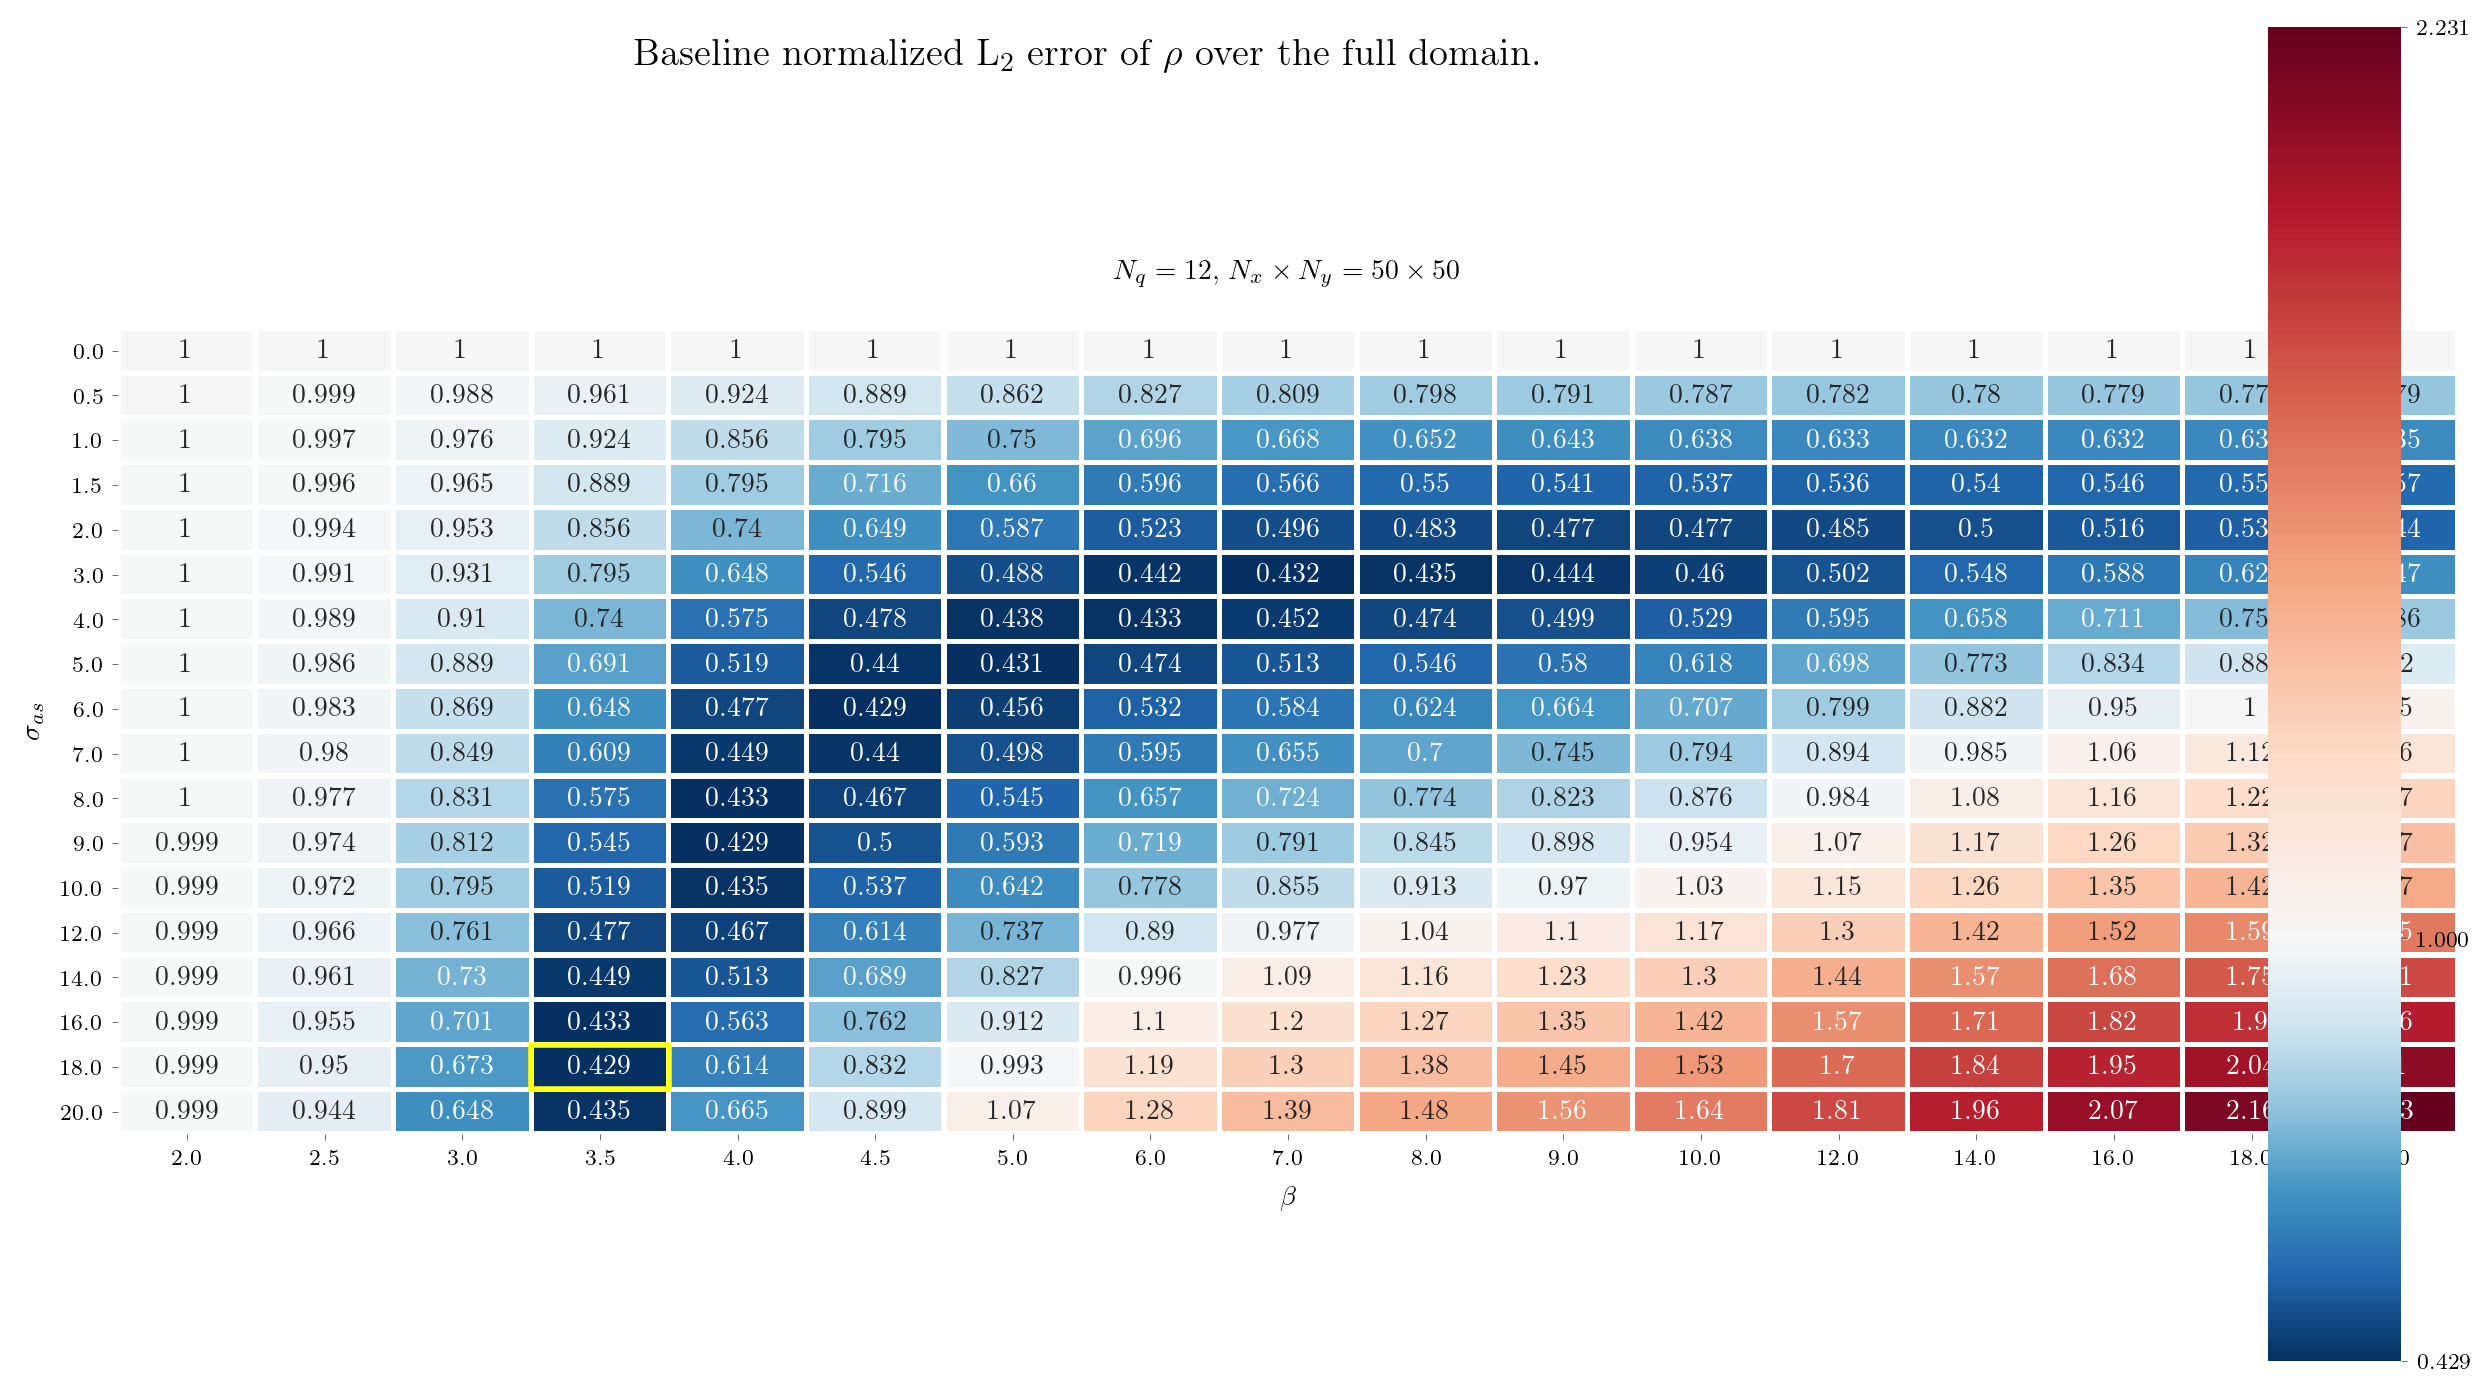

In [3]:
normalized = True
nq = [12]
r = [0.2,0.6,0.9]
fsl = 20
plt.style.use("kitish")
df["convolutionwidthcorrect"] = np.round(df["convolutionwidth"] ,3)
for nattr,attr in enumerate(["absL2"]):

    for inx,nx,i,order in zip([0],[50],[0],[2]):
            fig,ax = plt.subplots(1,1,figsize=(14,7))
            #matplotlib.rc('font', **font)
    
    #for inx,nx in enumerate([50,100,200]):
    #    for i,order in enumerate([2,3,4]):
    #        ax = axs[inx,i]
            
            dftmp = df[df["quadratureorder"]==order]
            dftmp = dftmp[dftmp["nx"]==nx] 
            piv = dftmp.pivot(index="convolutionmagnitude",columns="convolutionwidthcorrect",values=attr)
            if normalized: # divide all errors by the base line error, i.e. no AS
                piv = piv.div(piv.values[0,:])
            #piv = np.log10(piv)
            cmap = sns.color_palette("RdBu_r", 20001)
            vmin = piv.values.min()
            vmax = piv.values.max()
            vcenter = np.min(piv.values[0,:])
            if vmax == vcenter: # we don't need a diverging colormap because all values are smaller than baseline
                vcenter = (vmax+vmin)/2
                cmap = "Blues_r"
            if vmin==vcenter:
                vcenter= (vmax+vmin)/2
                cmap = "Reds"
            print(vmin)
            print(vmax)
            print(vcenter)
            divnorm = DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
            sns.heatmap(piv,annot=True,  linewidths=1.5, ax=ax, fmt=".3g",cmap=cmap,norm=divnorm,
                    cbar_kws={"ticks":[vmin,vcenter,vmax]},annot_kws={"fontsize":10})
            
            # set axis style
            ax.set_title(r"$N_q={},\, N_x \times N_y={}\times{}$".format(nq[i],nx,nx),pad = 10)
            ax.set_ylim(18, -0.5)
            ax.set_xlabel(r"$\beta$", labelpad = 6)
            ax.set_ylabel(r"$\sigma_{as}$",labelpad = 6)
            
            plt.xticks(fontsize=8)
            plt.yticks(fontsize=8,rotation=0)
            cax = plt.gcf().axes[-1]
            cax.tick_params(labelsize=8)
            # find the best element and circle it in yellow 
            pivu = piv.unstack()
            minwidth,minstr = pivu.idxmin()
            for posj,j in enumerate(np.sort(np.unique(df["convolutionwidth"]))):
                for posk,k in enumerate(np.sort(np.unique(df["convolutionmagnitude"]))):
                    if minwidth==j and minstr == k:
                        #print("{},{},{},{}".format(posj,j,posk,k))
                        ax.add_patch(Rectangle((posj,posk), 1, 1, fill=False, edgecolor='xkcd:yellow', lw=2))
            firstword = "Baseline normalized" if normalized else "Absolute"
            if nattr==0:
                plt.suptitle(r"{} L$_2$ error of $\rho$ over the full domain.".format(firstword),fontsize=14 )
            else:
                plt.suptitle(r"{} L$_2$ error of $\rho$ along circle of radius $r={}$".format(firstword,r[nattr-1]),fontsize=14)
            fig.tight_layout(rect=[0, 0.03, 1, 0.95])
            if normalized:
                plt.savefig("{}_{}_ictt_heatmap_{}_normalized.png".format(nx,order,attr))
            else:
                plt.savefig("{}_{}_ictt_heatmap_{}.png".format(nx,order,attr))